In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
bracket_df = pd.read_csv('../Data_cleaning/barttorvik_all_years.csv')
bracket_df.head()

,Year,Seed,School,Round Finished,Conf,G,Rec,AdjOE,AdjDE,AdjNR,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB
0,2008,1,Kansas,6.0,B12,33,30–3,121.1,85.9,35.2,...,37.5,30.8,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9
1,2008,1,Memphis,5.0,CUSA,34,33–1,113.4,84.0,29.4,...,38.6,32.7,53.3,41.6,35.0,29.8,36.7,28.7,70.7,9.0
2,2008,1,UCLA,4.0,P10,33,30–3,116.4,87.2,29.2,...,38.0,25.7,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.7
3,2008,3,Wisconsin,2.0,B10,33,29–4,112.3,85.2,27.1,...,39.3,25.4,49.2,41.3,35.9,31.1,31.1,32.8,63.5,8.2
4,2008,2,Duke,1.0,ACC,32,27–5,117.3,89.0,28.3,...,40.4,32.0,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9


In [2]:
#Split Record into Wins and Losses
bracket_df[['Wins', 'Losses']] = bracket_df['Rec'].str.split('–', expand=True)

#Change Columns to Ints
bracket_df['Wins'] = bracket_df['Wins'].astype(int)
bracket_df['Losses'] = bracket_df['Losses'].astype(int)

#Drop Rec Column
clean_df = bracket_df.drop(columns=['Rec', 'School', 'Conf'])

clean_df.head()

,Year,Seed,Round Finished,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses
0,2008,1,6.0,33,121.1,85.9,35.2,0.9810,56.3,44.8,...,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,30,3
1,2008,1,5.0,34,113.4,84.0,29.4,0.9692,53.0,42.5,...,53.3,41.6,35.0,29.8,36.7,28.7,70.7,9.0,33,1
2,2008,1,4.0,33,116.4,87.2,29.2,0.9653,52.3,48.0,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.7,30,3
3,2008,3,2.0,33,112.3,85.2,27.1,0.9599,50.6,43.1,...,49.2,41.3,35.9,31.1,31.1,32.8,63.5,8.2,29,4
4,2008,2,1.0,32,117.3,89.0,28.3,0.9597,54.1,47.6,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,27,5


In [3]:
#Exclude 2025 data from CSV

#Create Copy of Data
copy_df = clean_df.copy()

#Create New Dataframe for all years except 2025
no_2025_df = copy_df.loc[(clean_df["Year"] != 2025)]


In [4]:
#Use list comprehension to create Sweet 16 values

s_16 = [1 if x >= 2 else 0 for x in no_2025_df['Round Finished']]

#Assign list to column
no_2025_df['Sweet 16'] = s_16
#Show Dataframe
no_2025_df.head()

/var/folders/f6/crwn6xns7ng5zdqghg60td240000gn/T/ipykernel_16876/1305749034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_2025_df['Sweet 16'] = s_16


,Year,Seed,Round Finished,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,...,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses,Sweet 16
0,2008,1,6.0,33,121.1,85.9,35.2,0.9810,56.3,44.8,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,30,3,1
1,2008,1,5.0,34,113.4,84.0,29.4,0.9692,53.0,42.5,...,41.6,35.0,29.8,36.7,28.7,70.7,9.0,33,1,1
2,2008,1,4.0,33,116.4,87.2,29.2,0.9653,52.3,48.0,...,46.8,33.8,34.2,28.1,27.9,66.2,10.7,30,3,1
3,2008,3,2.0,33,112.3,85.2,27.1,0.9599,50.6,43.1,...,41.3,35.9,31.1,31.1,32.8,63.5,8.2,29,4,1
4,2008,2,1.0,32,117.3,89.0,28.3,0.9597,54.1,47.6,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,27,5,0


In [5]:
#Drop Round Finished from DataFrame
sweet_16_df = no_2025_df.drop(columns='Round Finished')

sweet_16_df.head()

,Year,Seed,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,TOR,...,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses,Sweet 16
0,2008,1,33,121.1,85.9,35.2,0.9810,56.3,44.8,18.7,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,30,3,1
1,2008,1,34,113.4,84.0,29.4,0.9692,53.0,42.5,17.2,...,41.6,35.0,29.8,36.7,28.7,70.7,9.0,33,1,1
2,2008,1,33,116.4,87.2,29.2,0.9653,52.3,48.0,18.8,...,46.8,33.8,34.2,28.1,27.9,66.2,10.7,30,3,1
3,2008,3,33,112.3,85.2,27.1,0.9599,50.6,43.1,19.4,...,41.3,35.9,31.1,31.1,32.8,63.5,8.2,29,4,1
4,2008,2,32,117.3,89.0,28.3,0.9597,54.1,47.6,18.2,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,27,5,0


In [6]:
#Create Dummies Dataframe
dummies_df = pd.get_dummies(sweet_16_df)
dummies_df.head()

,Year,Seed,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,TOR,...,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses,Sweet 16
0,2008,1,33,121.1,85.9,35.2,0.9810,56.3,44.8,18.7,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,30,3,1
1,2008,1,34,113.4,84.0,29.4,0.9692,53.0,42.5,17.2,...,41.6,35.0,29.8,36.7,28.7,70.7,9.0,33,1,1
2,2008,1,33,116.4,87.2,29.2,0.9653,52.3,48.0,18.8,...,46.8,33.8,34.2,28.1,27.9,66.2,10.7,30,3,1
3,2008,3,33,112.3,85.2,27.1,0.9599,50.6,43.1,19.4,...,41.3,35.9,31.1,31.1,32.8,63.5,8.2,29,4,1
4,2008,2,32,117.3,89.0,28.3,0.9597,54.1,47.6,18.2,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,27,5,0


In [7]:
#separate Data into features and target arrays
y = dummies_df["Sweet 16"]
X = dummies_df.drop(columns="Sweet 16")

#Split the data into training and testing dataset\
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=25))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 15)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy", "precision", "recall"])

    return nn_model

In [10]:
#Import Keras Tuner
import keras_tuner as kt

#Create Tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=30,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [11]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=50,validation_data=(X_test_scaled,y_test))

In [12]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 11, 'num_layers': 2, 'units_0': 16, 'units_1': 6, 'units_2': 21, 'units_3': 11, 'units_4': 21, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0045'}
{'activation': 'tanh', 'first_units': 16, 'num_layers': 5, 'units_0': 26, 'units_1': 26, 'units_2': 1, 'units_3': 11, 'units_4': 26, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 16, 'num_layers': 5, 'units_0': 26, 'units_1': 26, 'units_2': 1, 'units_3': 11, 'units_4': 26, 'tuner/epochs': 7, 'tuner/initial_epoch': 3, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0011'}


In [13]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy, model_precision, model_recall = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}, Precision: {model_precision}, Recall: {model_recall}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 - 0s - 19ms/step - accuracy: 0.8481 - loss: 0.4167 - precision: 0.7222 - recall: 0.6000
Loss: 0.4167346954345703, Accuracy: 0.8481481671333313, Precision: 0.7222222089767456, Recall: 0.6000000238418579
9/9 - 0s - 19ms/step - accuracy: 0.8444 - loss: 0.4169 - precision: 0.7018 - recall: 0.6154
Loss: 0.41689804196357727, Accuracy: 0.8444444537162781, Precision: 0.7017543911933899, Recall: 0.6153846383094788
9/9 - 0s - 19ms/step - accuracy: 0.8444 - loss: 0.4142 - precision: 0.6885 - recall: 0.6462
Loss: 0.4141780436038971, Accuracy: 0.8444444537162781, Precision: 0.688524603843689, Recall: 0.6461538672447205


In [14]:
best_summary = tuner.get_best_hyperparameters(1)[0]
best_summary.values

{'activation': 'tanh',
 'first_units': 11,
 'num_layers': 2,
 'units_0': 16,
 'units_1': 6,
 'units_2': 21,
 'units_3': 11,
 'units_4': 21,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0045'}

In [15]:
first_tune = tuner.hypermodel.build(best_summary)
first_tune.fit(X_train_scaled,y_train,epochs=70)

Epoch 1/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.5882 - loss: 0.6877 - precision: 0.3036 - recall: 0.5266 
Epoch 2/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.7124 - loss: 0.5883 - precision: 0.4198 - recall: 0.7005
Epoch 3/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7507 - loss: 0.5338 - precision: 0.4659 - recall: 0.6608
Epoch 4/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.7865 - loss: 0.4952 - precision: 0.5471 - recall: 0.6321
Epoch 5/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7991 - loss: 0.4587 - precision: 0.5842 - recall: 0.6097
Epoch 6/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8377 - loss: 0.4248 - precision: 0.6760 - recall: 0.6102
Epoch 7/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.8560 - loss: 0.4012 - precision: 0.7615 - recall: 0.5742
Epoch 8/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.8410 - loss: 0.4165 - precision: 0.7106 - recall: 0.5391
Epoch 9/70
26/2

In [16]:
first_tune.evaluate(X_test_scaled, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7733 - loss: 0.4705 - precision: 0.5426 - recall: 0.5295  


[0.462301105260849, 0.7962962985038757, 0.5806451439857483, 0.5538461804389954]

In [17]:
df_2025 = copy_df.loc[(copy_df["Year"] == 2025)]
df_2025

,Year,Seed,Round Finished,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses
1079,2025,1,NaN,34,124.6,87.6,37.0,0.9830,52.7,44.9,...,49.0,43.9,39.8,30.9,34.5,43.1,62.2,11.6,30,4
1080,2025,1,NaN,34,127.4,90.8,36.6,0.9800,57.4,44.5,...,58.0,43.4,37.7,30.9,45.4,37.9,66.5,9.4,31,3
1081,2025,1,NaN,33,129.7,93.4,36.3,0.9775,55.7,46.0,...,56.1,47.2,36.8,29.2,40.6,34.8,68.5,12.5,28,5
1082,2025,1,NaN,34,127.0,94.0,33.0,0.9694,55.0,45.3,...,56.4,45.9,35.5,29.6,43.6,37.3,70.3,11.1,30,4
1083,2025,2,NaN,33,127.1,96.2,30.9,0.9606,56.3,47.9,...,59.7,48.8,35.0,30.8,46.2,35.1,75.4,9.8,25,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,2025,16,NaN,30,101.0,105.6,-4.6,0.3736,48.9,47.5,...,47.8,46.3,34.0,33.0,36.3,38.6,66.6,-7.8,19,11
1143,2025,16,NaN,32,101.5,108.0,-6.5,0.3309,51.8,52.1,...,51.1,53.1,35.1,33.6,44.8,35.7,64.2,-8.3,20,12
1144,2025,16,NaN,33,99.1,107.4,-8.3,0.2840,51.0,48.0,...,50.1,48.7,34.9,31.4,41.0,44.5,68.1,-8.2,21,12
1145,2025,16,NaN,33,101.3,110.7,-9.4,0.2662,47.1,50.3,...,45.4,50.4,32.9,33.4,42.9,39.5,68.4,-10.2,18,15


In [18]:
clean_2025 = df_2025.drop(columns='Round Finished')
clean_2025.head()

,Year,Seed,G,AdjOE,AdjDE,AdjNR,Barthag,EFG%,EFGD%,TOR,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB,Wins,Losses
1079,2025,1,34,124.6,87.6,37.0,0.9830,52.7,44.9,14.6,...,49.0,43.9,39.8,30.9,34.5,43.1,62.2,11.6,30,4
1080,2025,1,34,127.4,90.8,36.6,0.9800,57.4,44.5,14.4,...,58.0,43.4,37.7,30.9,45.4,37.9,66.5,9.4,31,3
1081,2025,1,33,129.7,93.4,36.3,0.9775,55.7,46.0,13.4,...,56.1,47.2,36.8,29.2,40.6,34.8,68.5,12.5,28,5
1082,2025,1,34,127.0,94.0,33.0,0.9694,55.0,45.3,15.0,...,56.4,45.9,35.5,29.6,43.6,37.3,70.3,11.1,30,4
1083,2025,2,33,127.1,96.2,30.9,0.9606,56.3,47.9,16.7,...,59.7,48.8,35.0,30.8,46.2,35.1,75.4,9.8,25,8


In [20]:
# Create a StandardScaler instances
scaler_2025 = StandardScaler()

# Fit the StandardScaler
scaler25 = scaler.fit(clean_2025)

# Scale the data
scaled_2025 = scaler25.transform(clean_2025)

In [28]:
#Use model to predict 2025 Sweet 16 probabilities
prediction_2025 = first_tune.predict(scaled_2025)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [50]:
#Create new Dataframe to Pull team names From
name_df = bracket_df.copy()

names_2025 = name_df.loc[(bracket_df["Year"] == 2025)]
names_2025.head(68)

,Year,Seed,School,Round Finished,Conf,G,Rec,AdjOE,AdjDE,AdjNR,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,Adj T.,WAB
1079,2025,1,Houston,NaN,B12,34,30–4,124.6,87.6,37.0,...,28.2,34.1,49.0,43.9,39.8,30.9,34.5,43.1,62.2,11.60
1080,2025,1,Duke,NaN,ACC,34,31–3,127.4,90.8,36.6,...,32.1,25.4,58.0,43.4,37.7,30.9,45.4,37.9,66.5,9.40
1081,2025,1,Auburn,NaN,SEC,33,28–5,129.7,93.4,36.3,...,33.5,39.2,56.1,47.2,36.8,29.2,40.6,34.8,68.5,12.50
1082,2025,1,Florida,NaN,SEC,34,30–4,127.0,94.0,33.0,...,32.6,33.0,56.4,45.9,35.5,29.6,43.6,37.3,70.3,11.10
1083,2025,2,Alabama,NaN,SEC,33,25–8,127.1,96.2,30.9,...,40.1,33.9,59.7,48.8,35.0,30.8,46.2,35.1,75.4,9.80
1084,2025,2,Tennessee,NaN,SEC,34,27–7,118.8,90.4,28.4,...,35.4,29.4,54.1,46.7,34.0,27.8,43.0,45.1,64.6,9.30
1085,2025,3,Texas Tech,NaN,B12,33,25–8,125.7,96.9,28.8,...,29.7,33.5,54.3,48.2,37.9,31.7,44.6,34.1,66.3,5.80
1086,2025,3,Iowa St.,NaN,B12,33,24–9,119.5,92.6,26.9,...,38.5,28.9,55.1,47.5,35.8,33.2,36.9,40.7,69.3,5.40
1087,2025,4,Arizona,NaN,B12,34,22–12,123.4,96.3,27.1,...,36.6,29.2,55.1,47.2,32.4,33.6,34.6,41.9,70.6,5.40
1088,2025,4,Maryland,NaN,B10,33,25–8,118.0,92.4,25.6,...,32.9,25.9,52.7,47.6,37.2,30.7,35.5,35.8,70.6,4.60


In [34]:
len(prediction_2025)

68

In [59]:
#Turn nested list into a flattened list
flattened_prediction = []
for sublist in prediction_2025:
    for item in sublist:
        flattened_prediction.append(item)

#sorted_predictions = sorted(flattened_prediction, reverse=True)

In [85]:
#Create Dataframe with Names and Predictions

#Create dictionary of Schools and Prediction
data = {
    'School': names_2025['School'],
    'Probability': flattened_prediction
}

#Create DataFrame
df = pd.DataFrame(data)

#Sort Dataframe
df_sorted = df.sort_values(by='Probability', ascending=False)

df_sorted.head(22)

,School,Probability
1092,St. John's,0.960765
1081,Auburn,0.956644
1082,Florida,0.953329
1093,BYU,0.917789
1086,Iowa St.,0.892670
1083,Alabama,0.841131
1080,Duke,0.813875
1089,Gonzaga,0.797226
1094,Kentucky,0.698082
1100,Louisville,0.568174


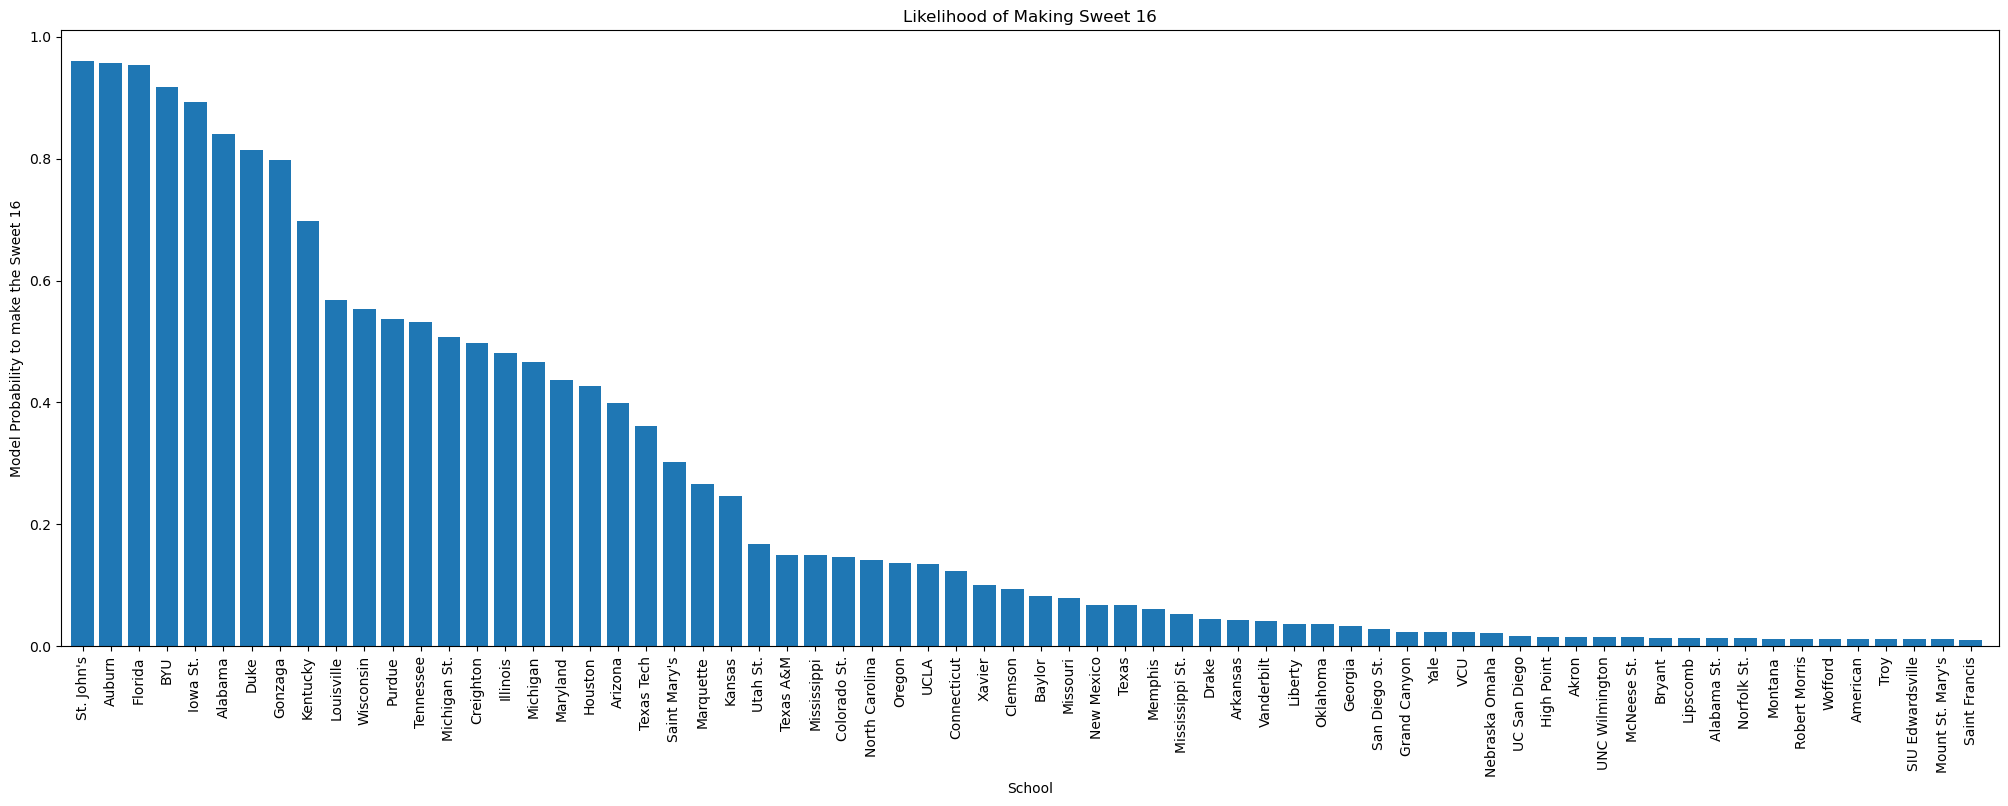

In [81]:
df_sorted2 = df_sorted.sort_values(by='Probability', ascending=False)

sorted_school = df_sorted2['School']
sorted_probability = df_sorted2['Probability']

plt.figure(figsize=(25,8))
plt.bar(sorted_school, sorted_probability)

plt.xticks(rotation=90)

plt.xlim(-0.75, len(sorted_school))
plt.ylim(0, max(sorted_probability)+.05)

plt.title("Likelihood of Making Sweet 16")
plt.xlabel("School")
plt.ylabel("Model Probability to make the Sweet 16")


plt.show()